In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
print("Imported")

Imported


,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%
9,10,Missing,9,1.30%


In [67]:
#IMPORTING FILE POPULATION
population=pd.read_csv("population.csv")
population.drop(['Rural population','Urban population','Sno'],axis=1,inplace=True)
population.head()




,State / Union Territory,Population,Area,Density,Gender Ratio
0,Uttar Pradesh,199812341,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,Maharashtra,112374333,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,Bihar,104099452,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,West Bengal,91276115,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,Madhya Pradesh,72626809,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [71]:
#IMPORTING FILE COVID19 INDIA
cv19india=pd.read_csv("covid19India.csv")
cv19india.drop(['Sno'],axis=1,inplace=True)
cv19india.head(20)

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3
5,04/02/20,6:00 PM,Kerala,3,0,0,0,3
6,05/02/20,6:00 PM,Kerala,3,0,0,0,3
7,06/02/20,6:00 PM,Kerala,3,0,0,0,3
8,07/02/20,6:00 PM,Kerala,3,0,0,0,3
9,08/02/20,6:00 PM,Kerala,3,0,0,0,3


In [21]:
#IMPORTING HOSPITAL BEDS INDIA
beds=pd.read_csv("hospitalbeds_india.csv")
beds.head(1)

,Sno,State/UT,NumPrimaryHealthCenters_HMIS,NumCommunityHealthCenters_HMIS,NumSubDistrictHospitals_HMIS,NumDistrictHospitals_HMIS,TotalPublicHealthFacilities_HMIS,NumPublicBeds_HMIS,NumRuralHospitals_NHP18,NumRuralBeds_NHP18,NumUrbanHospitals_NHP18,NumUrbanBeds_NHP18
0,1,Andaman & Nicobar Islands,27,4,NaN,3,34,1246,27,575,3,500


In [22]:
#IMPORTING FILE ICMR TESTING
icmr=pd.read_csv("icmr_testing.csv")
icmr.head(1)

,lab,address,pincode,city,state,type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory


ValueError: columns overlap but no suffix specified: Index(['Sno'], dtype='object')

In [153]:
popagg=population.groupby("State / Union Territory").sum()
popagg.head()
popagg.rename(columns={'State':'Population'},inplace=True)
popagg.rename_axis("State",inplace=True)
popagg.head()






,Population,Gender Ratio
State,,
Andaman and Nicobar Islands,380581,876
Andhra Pradesh,49577103,993
Arunachal Pradesh,1383727,938
Assam,31205576,954
Bihar,104099452,918


In [150]:
cvagg=cv19india.groupby("State/UnionTerritory").sum()
cvagg.rename_axis("State",inplace=True)
cvagg.head()

,Cured,Deaths,Confirmed
State,,,
Andaman and Nicobar Islands,1609,0,1984
Andhra Pradesh,77099,2836,150544
Arunachal Pradesh,61,0,633
Assam,11123,155,39170
Bihar,49041,692,113098


In [166]:
joindata=popagg.join(cvagg,how="inner")
joindata.head(100)


,Population,Gender Ratio,Cured,Deaths,Confirmed
State,,,,,
Andaman and Nicobar Islands,380581,876,1609,0,1984
Andhra Pradesh,49577103,993,77099,2836,150544
Arunachal Pradesh,1383727,938,61,0,633
Assam,31205576,954,11123,155,39170
Bihar,104099452,918,49041,692,113098
Chandigarh,1055450,818,5949,136,10609
Chhattisgarh,25545198,991,5936,47,17629
Dadra and Nagar Haveli and Daman and Diu,585764,711,4,0,60
Delhi,16787941,868,271477,15937,700683


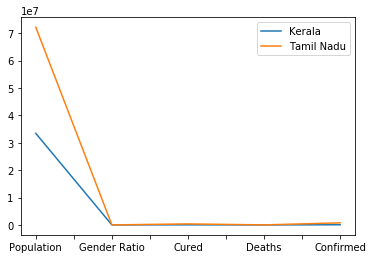